In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [12, 4]
plt.style.use("ggplot")

In [100]:
TEACHERS_FILE = "../models/teachers.csv"
STUDENTS_FILE = "../models/students.csv"

In [101]:
def get_mean_value(data, field="test_accuracy"):
    method = data["mode"].values
    if len(method) == 0:
        return (np.nan, np.nan, 0)
    method = method[0]

    values = data[field]
    mean = values.mean()
    std = values.std()
    sem = values.sem()
    return (mean, sem, len(values))

In [102]:
def plot_table(data, column_headers, row_headers, title_text):
    fig_background_color = "skyblue"
    fig_border = "steelblue"
    # Table data needs to be non-numeric text. Format the data
    cell_text = []
    for row in data:
        cell_text.append([f"{x[0]*100:2.2f} ({x[1]*100:1.2f}), {x[2]}" for x in row])
    # Get some lists of color specs for row and column headers
    rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
    # Create the figure. Setting a small pad on tight_layout
    # seems to better regulate white space. Sometimes experimenting
    # with an explicit figsize here can produce better outcome.
    plt.figure(
        linewidth=2,
        edgecolor=fig_border,
        facecolor=fig_background_color,
        tight_layout={"pad": 0},
        # figsize=(5,3)
    )
    # Add a table at the bottom of the axes
    the_table = plt.table(
        cellText=cell_text,
        rowLabels=row_headers,
        rowColours=rcolors,
        rowLoc="right",
        colColours=ccolors,
        colLabels=column_headers,
        loc="center",
    )
    # Scaling is the only influence we have over top and bottom cell padding.
    # Make the rows taller (i.e., make cell y scale larger).
    the_table.scale(1, 1.5)
    # Hide axes
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Hide axes border
    plt.box(on=None)
    # Add title
    plt.suptitle(title_text)
    # Force the figure to update, so backends center objects correctly within the figure.
    # Without plt.draw() here, the title will center on the axes and not the figure.
    plt.draw()
    # Create image. plt.savefig ignores figure edge and face colors, so map them.
    fig = plt.gcf()
    plt.savefig(
        "pyplot-table-demo.png",
        # bbox='tight',
        edgecolor=fig.get_edgecolor(),
        facecolor=fig.get_facecolor(),
        dpi=150,
    )

1
['80.95 (0.48)', '82.08 (0.54)', '82.72 (0.25)']
0.9
['80.69 (0.44)', '82.07 (0.34)', '82.68 (0.38)']
0.8
['80.84 (0.72)', '81.03 (0.62)', '82.09 (0.24)']
0.7
['80.9 (0.31)', '80.78 (0.34)', '81.28 (0.22)']
0.6
['78.28 (0.94)', '79.94 (0.66)', '81.1 (0.5)']



1
['80.95 (0.93)', '81.18 (0.89)', '83.11 (0.22)']
0.9
['78.24 (0.5)', '81.89 (0.25)', '82.76 (0.31)']
0.8
['80.28 (0.71)', '81.48 (0.4)', '83.08 (0.31)']
0.7
['81.17 (0.31)', '81.64 (0.4)', '82.14 (0.47)']
0.6
['79.21 (0.41)', '80.61 (0.64)', '81.2 (0.51)']



1
['79.02 (1.18)', '82.84 (0.36)', '83.22 (0.21)']
0.9
['79.33 (0.69)', '81.92 (0.43)', '82.73 (0.19)']
0.8
['81.21 (0.6)', '81.83 (0.39)', '82.48 (0.23)']
0.7
['80.02 (1.12)', '81.44 (0.36)', '82.33 (0.25)']
0.6
['79.82 (0.57)', '79.94 (1.05)', '81.68 (0.67)']



1
['83.11 (0.38)', '82.82 (0.45)', '83.66 (0.31)']
0.9
['82.25 (0.7)', '82.17 (0.49)', '83.0 (0.32)']
0.8
['81.72 (0.31)', '81.26 (0.48)', '83.55 (0.22)']
0.7
['79.94 (1.18)', '82.01 (0.5)', '82.19 (0.49)']
0.6

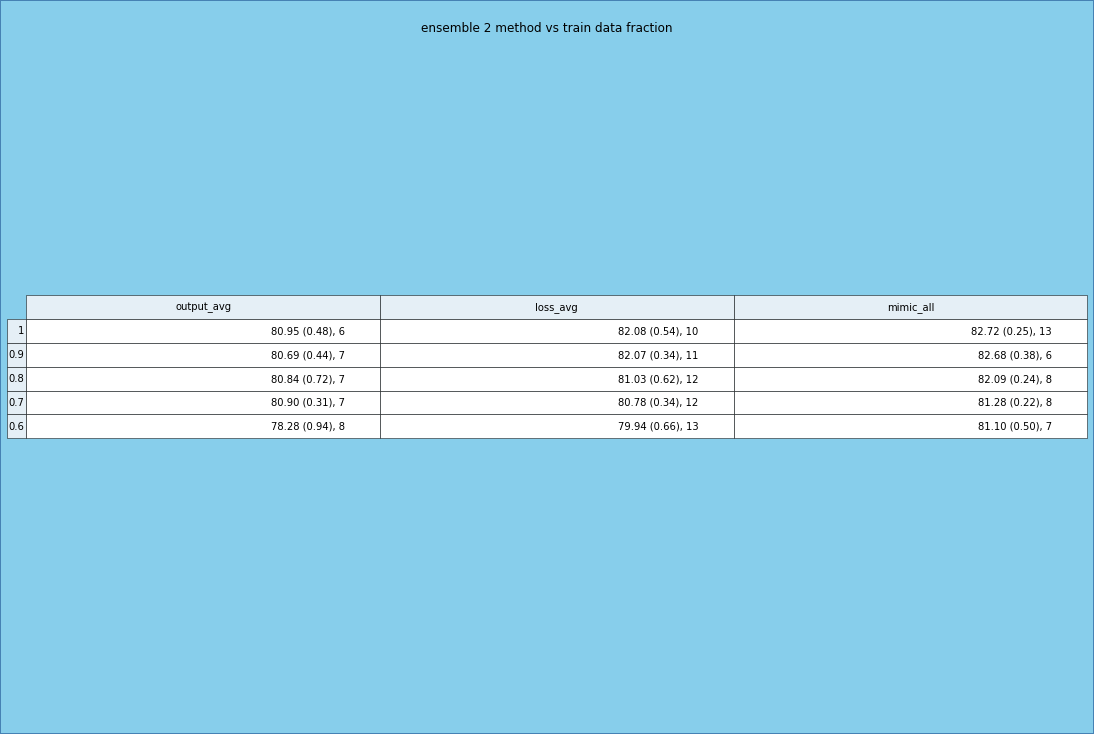

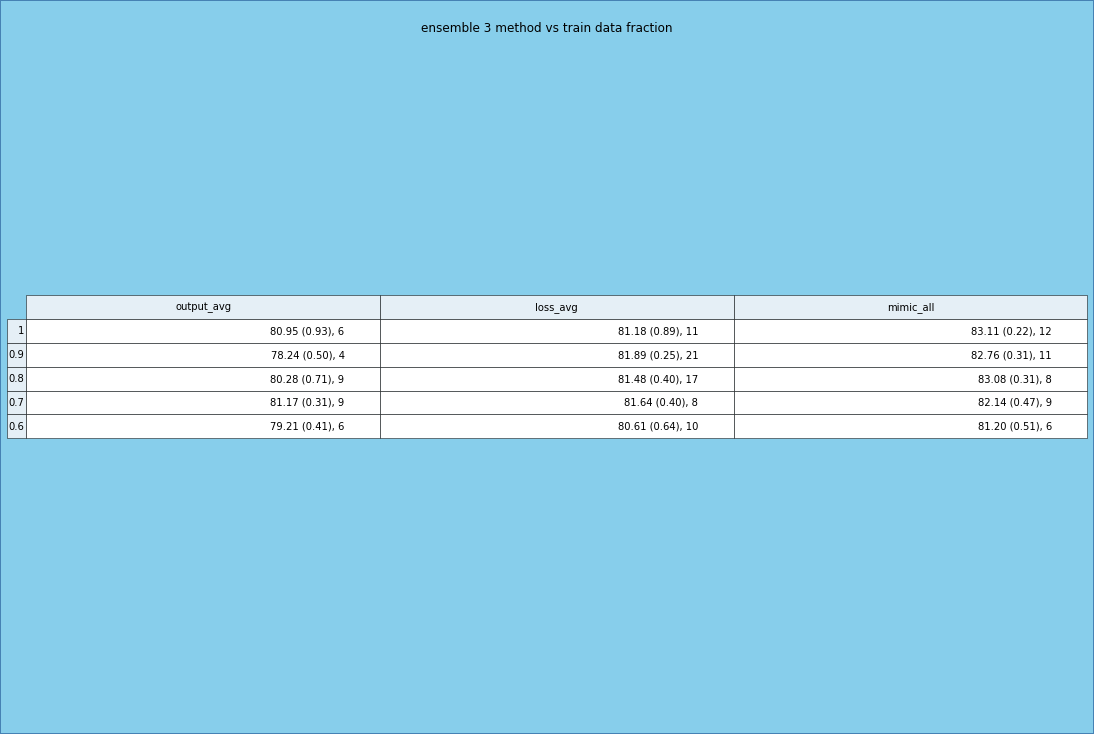

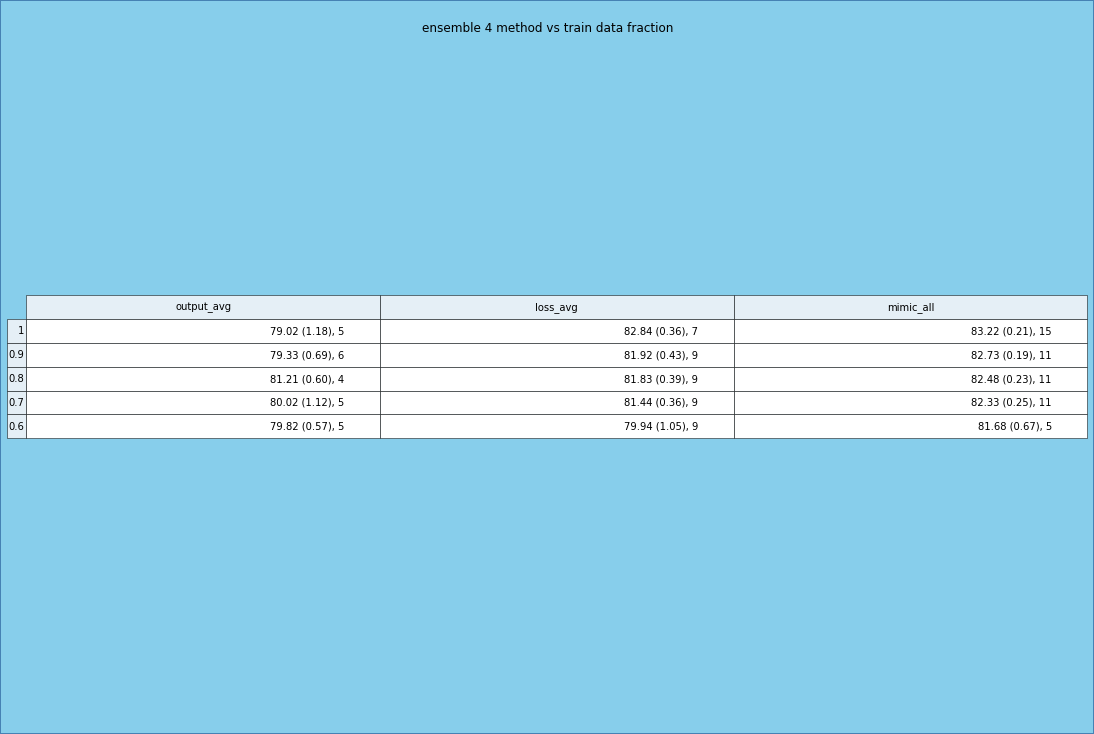

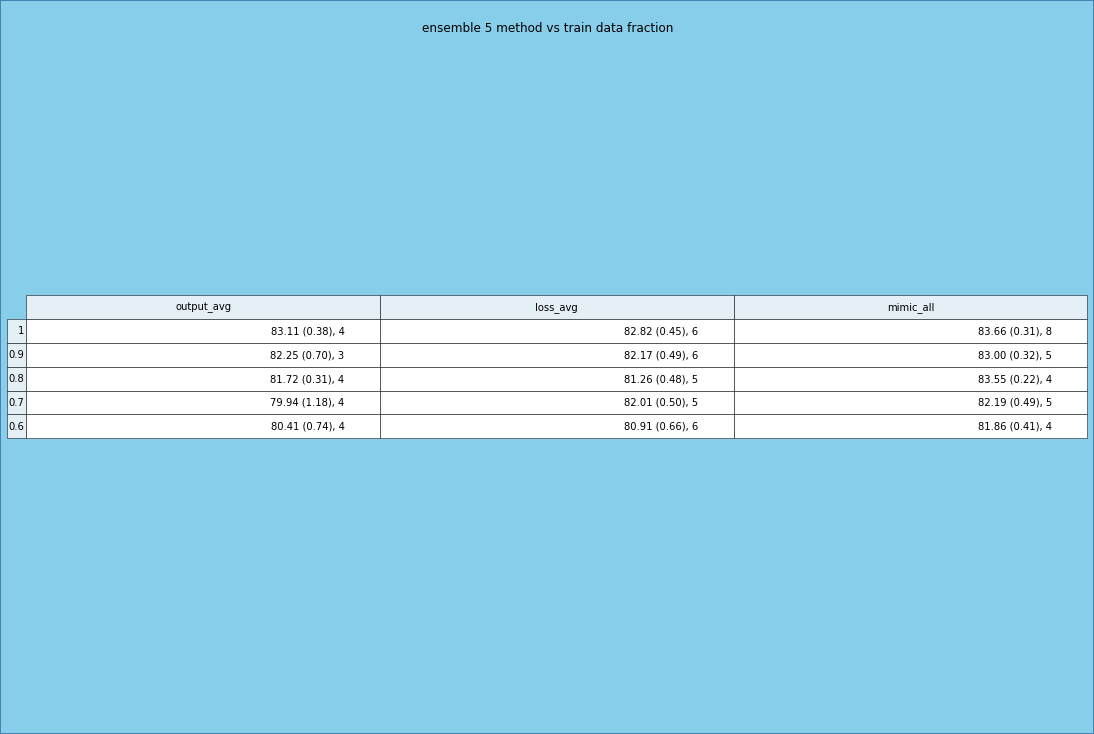

In [187]:
teachers = pd.read_csv(TEACHERS_FILE)
students = pd.read_csv(STUDENTS_FILE)

for n_teachers in [2, 3, 4, 5]:

    methods = ["output_avg", "loss_avg", "mimic_all"]
    subset_size = [1, 0.9, 0.8, 0.7, 0.6]
    alpha = [0, 0.25, 0.5, 0.75]

    data = students.loc[students["dataset"] == "cifar10"]
    data = data.loc[data["architecture"] == "resnet50_v2"]
    data = data.loc[data["n_teachers"] == n_teachers]

    title_text = f"ensemble {n_teachers} method vs train data fraction"

    column_headers = methods
    row_headers = subset_size

    table_data = []

    for fraction in subset_size:
        table_data.append([])
        print(fraction)
        values = []
        for method in methods:
            value = get_mean_value(
                data.loc[data["mode"] == method].loc[
                    data["teachers_fraction"] == fraction
                ]
            )
            table_data[-1].append(value)
            values.append(f"{round(value[0]*100,2)} ({round(value[1]*100,2)})")
        print(values)

    print("\n\n")

    plot_table(
        data=table_data,
        column_headers=column_headers,
        row_headers=row_headers,
        title_text=title_text,
    )

Text(0.5, 0, 'Train dataset fraction')

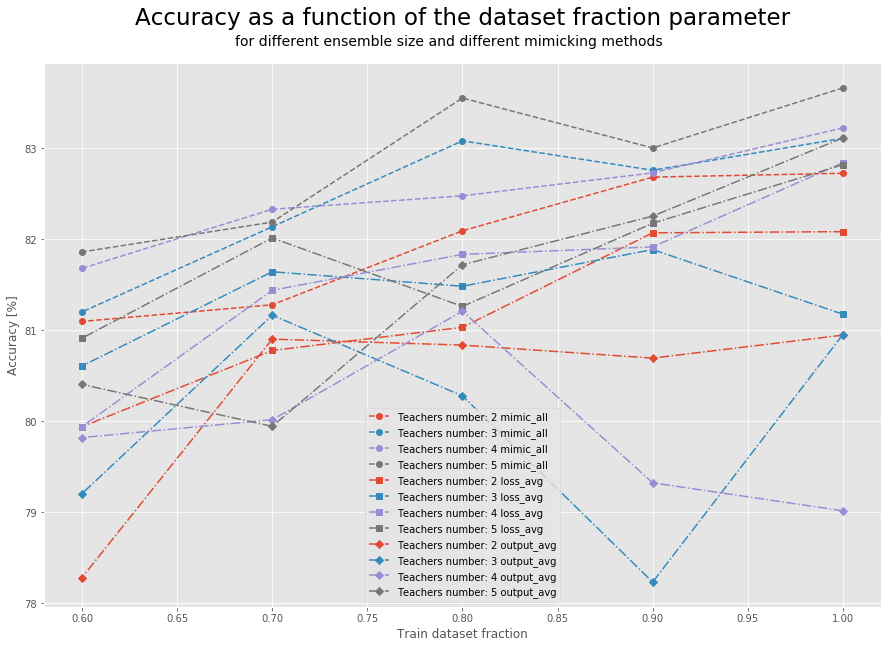

In [181]:
matplotlib.rcParams["figure.figsize"] = [15, 10]

fractions = [1, 0.9, 0.8, 0.7]
subset_size = [1, 0.9, 0.8, 0.7, 0.6]
teachers = [2, 3, 4, 5]
methods = ["output_avg", "loss_avg", "mimic_all"]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]

for n_teachers in teachers:
    n_data = data.loc[data["n_teachers"] == n_teachers]
    results = []
    for fraction in subset_size:
        value = get_mean_value(
            n_data.loc[data["mode"] == "mimic_all"].loc[
                data["teachers_fraction"] == fraction
            ]
        )
        results.append(value[0] * 100)
    plt.plot(
        subset_size, results, "--o", label=f"Teachers number: {n_teachers} mimic_all"
    )

plt.gca().set_prop_cycle(None)
for n_teachers in teachers:
    n_data = data.loc[data["n_teachers"] == n_teachers]
    results = []
    for fraction in subset_size:
        value = get_mean_value(
            n_data.loc[data["mode"] == "loss_avg"].loc[
                data["teachers_fraction"] == fraction
            ]
        )
        results.append(value[0] * 100)
    plt.plot(
        subset_size, results, "-.s", label=f"Teachers number: {n_teachers} loss_avg"
    )


plt.gca().set_prop_cycle(None)
for n_teachers in teachers:
    n_data = data.loc[data["n_teachers"] == n_teachers]
    results = []
    for fraction in subset_size:
        value = get_mean_value(
            n_data.loc[data["mode"] == "output_avg"].loc[
                data["teachers_fraction"] == fraction
            ]
        )
        results.append(value[0] * 100)
    plt.plot(
        subset_size, results, "-.D", label=f"Teachers number: {n_teachers} output_avg"
    )


plt.legend()
plt.title(
    "Accuracy as a function of the dataset fraction parameter", fontsize=23, y=1.06
)
plt.suptitle(
    "for different ensemble size and different mimicking methods", fontsize=14, y=0.92
)

plt.ylabel("Accuracy [%]")
plt.xlabel("Train dataset fraction")

Text(0.5, 0, 'Train dataset fraction')

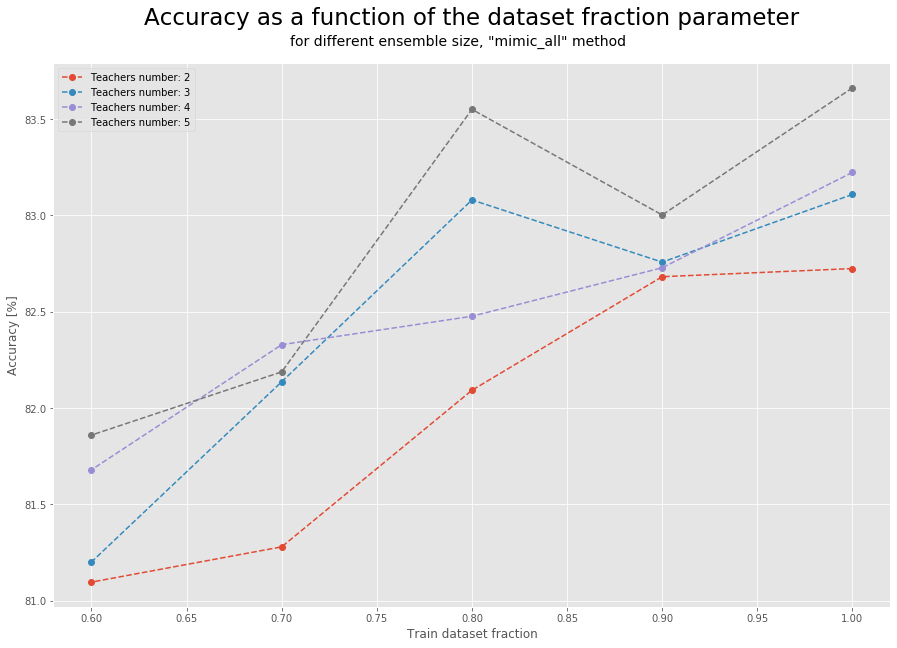

In [180]:
matplotlib.rcParams["figure.figsize"] = [15, 10]

fractions = [1, 0.9, 0.8, 0.7]
subset_size = [1, 0.9, 0.8, 0.7, 0.6]
teachers = [2, 3, 4, 5]
methods = ["output_avg", "loss_avg", "mimic_all"]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]

for n_teachers in teachers:
    n_data = data.loc[data["n_teachers"] == n_teachers]
    results = []
    for fraction in subset_size:
        value = get_mean_value(
            n_data.loc[data["mode"] == "mimic_all"].loc[
                data["teachers_fraction"] == fraction
            ]
        )
        results.append(value[0] * 100)
    plt.plot(subset_size, results, "--o", label=f"Teachers number: {n_teachers}")


plt.legend()
plt.title(
    "Accuracy as a function of the dataset fraction parameter", fontsize=23, y=1.06
)
plt.suptitle('for different ensemble size, "mimic_all" method', fontsize=14, y=0.92)

plt.ylabel("Accuracy [%]")
plt.xlabel("Train dataset fraction")

Text(0.5, 0, 'Number of teachers')

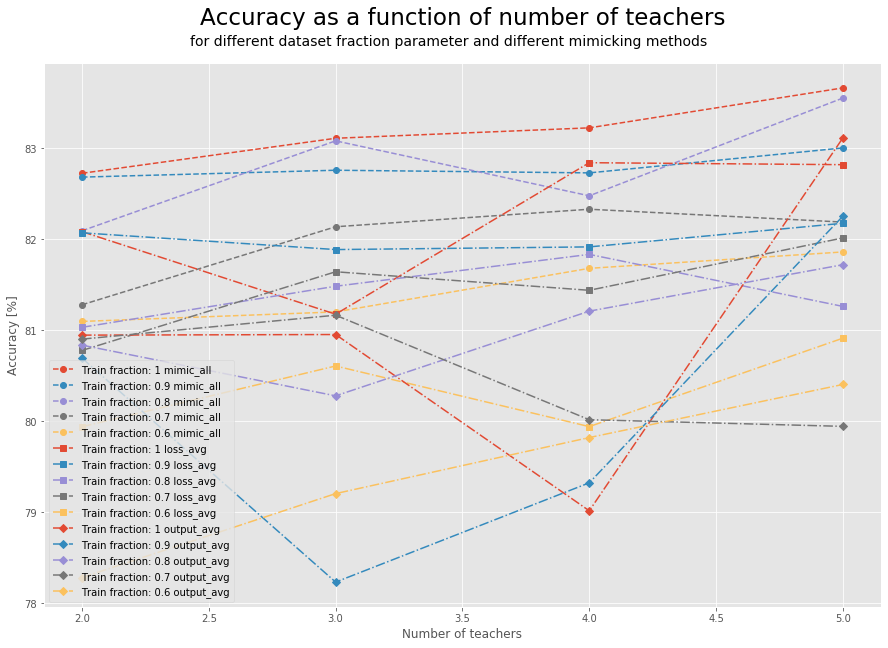

In [179]:
matplotlib.rcParams["figure.figsize"] = [15, 10]

fractions = [1, 0.9, 0.8, 0.7]
subset_size = [1, 0.9, 0.8, 0.7, 0.6]
teachers = [2, 3, 4, 5]
methods = ["output_avg", "loss_avg", "mimic_all"]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]

for fraction in subset_size:
    n_data = data.loc[data["teachers_fraction"] == fraction]
    results = []
    for n_teachers in teachers:
        value = get_mean_value(
            n_data.loc[data["mode"] == "mimic_all"].loc[
                data["n_teachers"] == n_teachers
            ]
        )
        results.append(value[0] * 100)
    plt.plot(teachers, results, "--o", label=f"Train fraction: {fraction} mimic_all")

plt.gca().set_prop_cycle(None)
for fraction in subset_size:
    n_data = data.loc[data["teachers_fraction"] == fraction]
    results = []
    for n_teachers in teachers:
        value = get_mean_value(
            n_data.loc[data["mode"] == "loss_avg"].loc[data["n_teachers"] == n_teachers]
        )
        results.append(value[0] * 100)
    plt.plot(teachers, results, "-.s", label=f"Train fraction: {fraction} loss_avg")

plt.gca().set_prop_cycle(None)
for fraction in subset_size:
    n_data = data.loc[data["teachers_fraction"] == fraction]
    results = []
    for n_teachers in teachers:
        value = get_mean_value(
            n_data.loc[data["mode"] == "output_avg"].loc[
                data["n_teachers"] == n_teachers
            ]
        )
        results.append(value[0] * 100)
    plt.plot(teachers, results, "-.D", label=f"Train fraction: {fraction} output_avg")


plt.legend()
plt.title("Accuracy as a function of number of teachers", fontsize=23, y=1.06)
plt.suptitle(
    "for different dataset fraction parameter and different mimicking methods",
    fontsize=14,
    y=0.92,
)

plt.ylabel("Accuracy [%]")
plt.xlabel("Number of teachers")

Text(0.5, 0, 'Number of teachers')

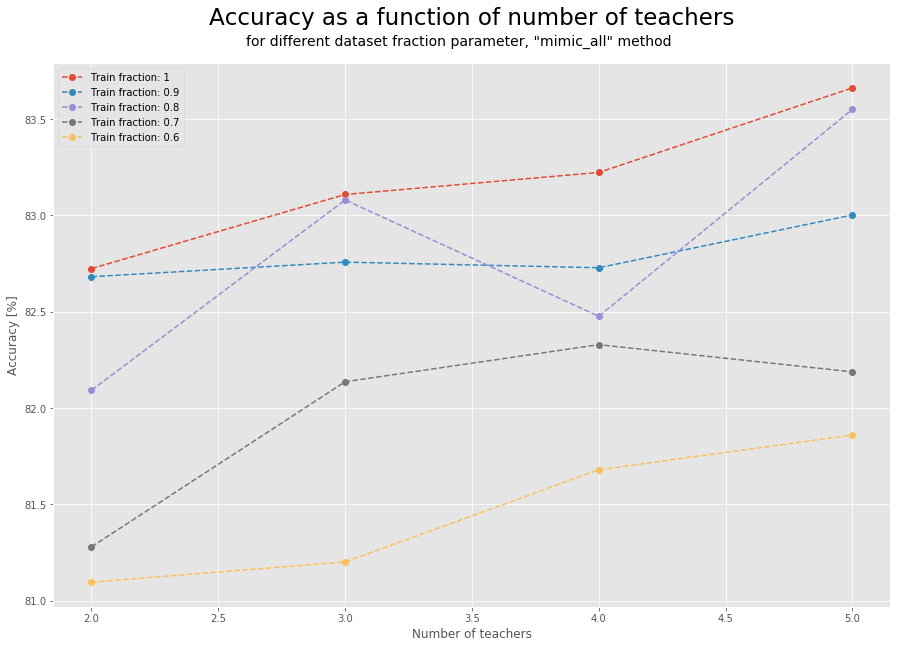

In [178]:
matplotlib.rcParams["figure.figsize"] = [15, 10]

fractions = [1, 0.9, 0.8, 0.7]
subset_size = [1, 0.9, 0.8, 0.7, 0.6]
teachers = [2, 3, 4, 5]
methods = ["output_avg", "loss_avg", "mimic_all"]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]

for fraction in subset_size:
    n_data = data.loc[data["teachers_fraction"] == fraction]
    results = []
    for n_teachers in teachers:
        value = get_mean_value(
            n_data.loc[data["mode"] == "mimic_all"].loc[
                data["n_teachers"] == n_teachers
            ]
        )
        results.append(value[0] * 100)
    plt.plot(teachers, results, "--o", label=f"Train fraction: {fraction}")


plt.legend()
plt.title("Accuracy as a function of number of teachers", fontsize=23, y=1.06)
plt.suptitle(
    'for different dataset fraction parameter, "mimic_all" method', fontsize=14, y=0.92
)

plt.ylabel("Accuracy [%]")
plt.xlabel("Number of teachers")

In [122]:
alpha_vals = [0, 0.25, 0.5, 0.75]
fractions = [1, 0.9, 0.8, 0.7]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]
data = data.loc[data["n_teachers"] == 3]
data = data.loc[data["mode"] == "mimic_all"]

alpha_results = {}
for fraction in fractions:
    alpha_results[fraction] = []
    for alpha in alpha_vals:
        value = get_mean_value(
            data.loc[data["alpha"] == alpha].loc[data["teachers_fraction"] == fraction]
        )
        alpha_results[fraction].append(value)

Text(0.5, 0, 'Alpha parameter')

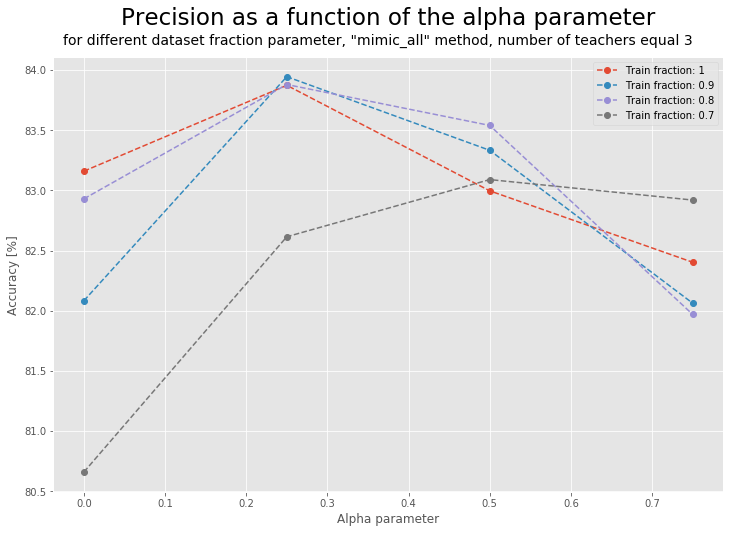

In [198]:
matplotlib.rcParams["figure.figsize"] = [12, 8]

alpha_vals = [0, 0.25, 0.5, 0.75]
fractions = [1, 0.9, 0.8, 0.7]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]
data = data.loc[data["n_teachers"] == 3]
data = data.loc[data["mode"] == "mimic_all"]

alpha_results = {}
for fraction in fractions:
    alpha_results[fraction] = []
    for alpha in alpha_vals:
        value = get_mean_value(
            data.loc[data["alpha"] == alpha].loc[data["teachers_fraction"] == fraction]
        )
        alpha_results[fraction].append(value)


for fraction in fractions:
    acc = [x[0] * 100 for x in alpha_results[fraction]]
    plt.plot(alpha_vals, acc, "--o", label=f"Train fraction: {fraction}")
plt.legend()
plt.title("Precision as a function of the alpha parameter", fontsize=23, y=1.06)
plt.suptitle(
    'for different dataset fraction parameter, "mimic_all" method, number of teachers equal 3',
    fontsize=14,
    y=0.92,
)


plt.ylabel("Accuracy [%]")
plt.xlabel("Alpha parameter")

Text(0.5, 0, 'Alpha parameter')

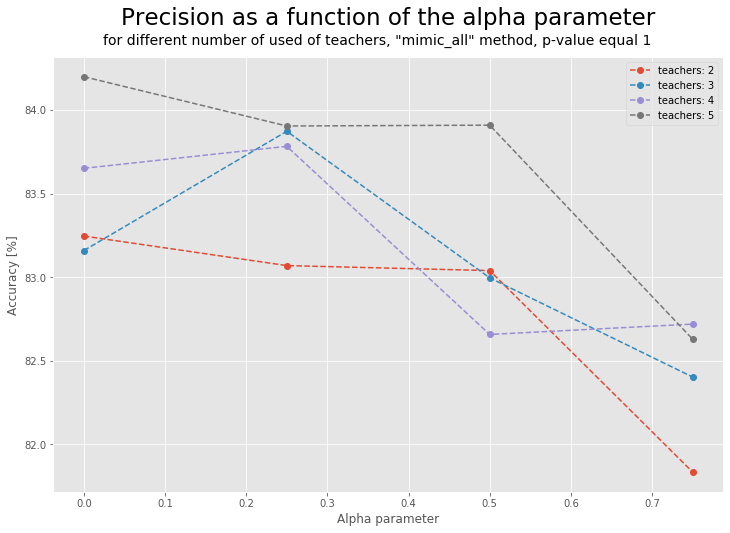

In [197]:
matplotlib.rcParams["figure.figsize"] = [12, 8]

alpha_vals = [0, 0.25, 0.5, 0.75]
fractions = [1, 0.9, 0.8, 0.7]

data = students.loc[students["dataset"] == "cifar10"]
data = data.loc[data["architecture"] == "resnet50_v2"]
# data = data.loc[data['n_teachers'] == 3]
data = data.loc[data["teachers_fraction"] == 1]
data = data.loc[data["mode"] == "mimic_all"]

alpha_results = {}
# for fraction in fractions:
for n_teachers in [2, 3, 4, 5]:
    alpha_results[n_teachers] = []
    for alpha in alpha_vals:
        #         value = get_mean_value(data.loc[data['alpha'] == alpha].loc[data['teachers_fraction'] == fraction])
        value = get_mean_value(
            data.loc[data["alpha"] == alpha].loc[data["n_teachers"] == n_teachers]
        )
        alpha_results[n_teachers].append(value)


for n_teachers in [2, 3, 4, 5]:
    acc = [x[0] * 100 for x in alpha_results[n_teachers]]
    plt.plot(alpha_vals, acc, "--o", label=f"Teachers number: {n_teachers}")
plt.legend()
plt.title("Precision as a function of the alpha parameter", fontsize=23, y=1.06)
plt.suptitle(
    'for different number of used of teachers, "mimic_all" method, p-value equal 1',
    fontsize=14,
    y=0.92,
)


plt.ylabel("Accuracy [%]")
plt.xlabel("Alpha parameter")